## *Data Cleaning and Preparation*
Sources used in this project:

- `Dataset` - [Vehicle dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

- All `metrics` and `formulas` are come from ISLP book - [An Introduction to Statistical Learning with Python](https://anthology-of-data.science/resources/james2023islp.pdf)


This notebook focuses on **transforming the raw dataset into a clean, machine-learning-ready format**. The primary objective is to handle inconsistencies, missing information, and non-numeric data to create a reliable foundation for modeling.

**Key Actions:**

* **Data Cleaning and Transformation:** Columns with mixed units (e.g., `mileage`, `engine`) are converted into pure numerical types. Missing values are then addressed by being filled with the median to avoid distorting the data distribution.
* **Feature Engineering:** More meaningful features are created by calculating the vehicle's age (`x1_num_of_years`) from the `year` column and by extracting `car_brand` and `car_type` from the `name` column.
* **Categorical Encoding:** Text-based categorical columns like `fuel` and `transmission` are converted into numerical representations so they can be used in mathematical models.
* **Outlier Removal:** Using a boxplot for visualization, extreme high-end price outliers (above the 95th percentile) are identified and removed to improve the model's robustness.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files, drive
from zipfile import ZipFile
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

le = LabelEncoder()


In [40]:
#files.upload()

###Data Loading and Preparation


In [41]:
!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho


Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0
vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
with ZipFile("/content/vehicle-dataset-from-cardekho.zip", "r") as zip_ref:
    zip_ref.extractall("/content/vehicle-dataset")


In [43]:
df = pd.read_csv("/content/vehicle-dataset/Car details v3.csv")
df.shape

(8128, 13)

In [44]:
df = df.copy()

In [45]:
df_cols = list(df.columns)
df_cols

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [46]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [47]:
for i in range(len(df_cols)):
  col_name = f"x{i}_{df_cols[i]}"
  if df_cols[i] == "selling_price":
    pass
  else: df_cols[i] = col_name

df.columns=df_cols
df.head()

,x0_name,x1_year,selling_price,x3_km_driven,x4_fuel,x5_seller_type,x6_transmission,x7_owner,x8_mileage,x9_engine,x10_max_power,x11_torque,x12_seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


##Data Cleaning


In [48]:
df.dtypes

,0
x0_name,object
x1_year,int64
selling_price,int64
x3_km_driven,int64
x4_fuel,object
x5_seller_type,object
x6_transmission,object
x7_owner,object
x8_mileage,object
x9_engine,object


In [49]:
empt_rows = []
for i in range(df.shape[0]):
    if df.iloc[i, :].isna().all():
        empt_rows.append(i)

empt_rows

[]

In [50]:
cols_to_fix = ["x8_mileage",	"x9_engine",	"x10_max_power"]
df[cols_to_fix].head()

,x8_mileage,x9_engine,x10_max_power
0,23.4 kmpl,1248 CC,74 bhp
1,21.14 kmpl,1498 CC,103.52 bhp
2,17.7 kmpl,1497 CC,78 bhp
3,23.0 kmpl,1396 CC,90 bhp
4,16.1 kmpl,1298 CC,88.2 bhp


In [51]:
df[cols_to_fix].isna().sum()

,0
x8_mileage,221
x9_engine,221
x10_max_power,215


In [52]:
df[cols_to_fix].dtypes

,0
x8_mileage,object
x9_engine,object
x10_max_power,object


In [53]:
for i in range(len(cols_to_fix)):
  df[cols_to_fix[i]] = df[cols_to_fix[i]].astype(str).str.split(" ").str[0]

"""for i in range(len(cols_to_fix)):
  df[cols_to_fix[i]] = pd.to_numeric(df[cols_to_fix[i]])
  ValueError: Unable to parse string "nan" at position 13
"""
df.iloc[13, :][8:]

,13
x8_mileage,nan
x9_engine,nan
x10_max_power,nan
x11_torque,NaN
x12_seats,NaN


In [54]:
df[cols_to_fix[0]] = df[cols_to_fix[0]].astype(float)
df[cols_to_fix[1]] = df[cols_to_fix[1]].astype(float)
df[cols_to_fix[2]] = pd.to_numeric(df[cols_to_fix[2]], errors="coerce")

In [55]:
df.rename(columns={
    "x8_mileage": "x8_mileage_kmpl",
    "x9_engine" : "x9_engine_cc",
    "x10_max_power" : "x10_max_power_bhp"
}, inplace=True)


In [56]:
from datetime import datetime
today = datetime.today()
df["today"] = today
df.today = df.today.astype(str).str.split("-").str[0]
df["x1_num_of_years"] = pd.to_numeric(df.today) - pd.to_numeric(df.x1_year)
df.drop(columns=["today", "x1_year"], inplace=True)


In [57]:
df.x1_num_of_years.head()

,x1_num_of_years
0,11
1,11
2,19
3,15
4,18


In [58]:
df["x4_fuel"].value_counts()


,count
x4_fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [59]:
df.x5_seller_type.value_counts()

,count
x5_seller_type,
Individual,6766
Dealer,1126
Trustmark Dealer,236


In [60]:
df.x6_transmission.value_counts()

,count
x6_transmission,
Manual,7078
Automatic,1050


In [61]:
df.x7_owner.value_counts()

,count
x7_owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [62]:
mappings = {
    "x4_fuel": {
        "Diesel": 1,
        "Petrol": 2,
        "CNG": 3,
        "LPG": 4
    },
    "x5_seller_type": {
        "Individual": 1,
        "Dealer": 2,
        "Trustmark Dealer": 3
    },
    "x6_transmission": {
        "Manual": 1,
        "Automatic": 2
    },
    "x7_owner" : {
      "First Owner" : 1,
      "Second Owner" : 2,
      "Third Owner" : 3,
      "Fourth & Above Owner" : 4,
      "Test Drive Car" : 5

    }
}
df.replace(mappings, inplace=True)


/tmp/ipython-input-4110997476.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mappings, inplace=True)


In [63]:
df.head()

,x0_name,selling_price,x3_km_driven,x4_fuel,x5_seller_type,x6_transmission,x7_owner,x8_mileage_kmpl,x9_engine_cc,x10_max_power_bhp,x11_torque,x12_seats,x1_num_of_years
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18


In [64]:
df["car_brand"] = df.x0_name.str.split(" ").str[0]
df["car_type"] = df.x0_name.str.split(" ").str[1]
df.car_brand = le.fit_transform(df.car_brand)
df.car_type = le.fit_transform(df.car_type)
df.drop(columns = ["x11_torque"], inplace=True)
df.head()

,x0_name,selling_price,x3_km_driven,x4_fuel,x5_seller_type,x6_transmission,x7_owner,x8_mileage_kmpl,x9_engine_cc,x10_max_power_bhp,x12_seats,x1_num_of_years,car_brand,car_type
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,11,20,161
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,11,27,135
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,19,10,36
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,15,11,206
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,18,20,161


In [65]:
df.columns

Index(['x0_name', 'selling_price', 'x3_km_driven', 'x4_fuel', 'x5_seller_type',
       'x6_transmission', 'x7_owner', 'x8_mileage_kmpl', 'x9_engine_cc',
       'x10_max_power_bhp', 'x12_seats', 'x1_num_of_years', 'car_brand',
       'car_type'],
      dtype='object')

In [66]:
col_name = list(df.columns)
col_name = ['name',
 'y_selling_price',
 'x1_km_driven',
 'x2_fuel',
 'x3_seller_type',
 'x4_transmission',
 'x5_owner',
 'x6_mileage_kmpl',
 'x7_engine_cc',
 'x8_max_power_bhp',
 'x9_seats',
 'x10_num_of_years',
 'x11_car_brand',
 'x12_car_type']
df.columns = col_name
df.head()

,name,y_selling_price,x1_km_driven,x2_fuel,x3_seller_type,x4_transmission,x5_owner,x6_mileage_kmpl,x7_engine_cc,x8_max_power_bhp,x9_seats,x10_num_of_years,x11_car_brand,x12_car_type
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,11,20,161
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,11,27,135
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,19,10,36
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,15,11,206
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,18,20,161


In [67]:
df_na = df.loc[:, df.isna().any()==True]

In [68]:
df.isna().sum()

,0
name,0
y_selling_price,0
x1_km_driven,0
x2_fuel,0
x3_seller_type,0
x4_transmission,0
x5_owner,0
x6_mileage_kmpl,221
x7_engine_cc,221
x8_max_power_bhp,216


In [69]:
na_cols = list(df_na.columns)

In [70]:
median_values = df[na_cols].median()
df = df.fillna(median_values)
df.isna().sum()

,0
name,0
y_selling_price,0
x1_km_driven,0
x2_fuel,0
x3_seller_type,0
x4_transmission,0
x5_owner,0
x6_mileage_kmpl,0
x7_engine_cc,0
x8_max_power_bhp,0


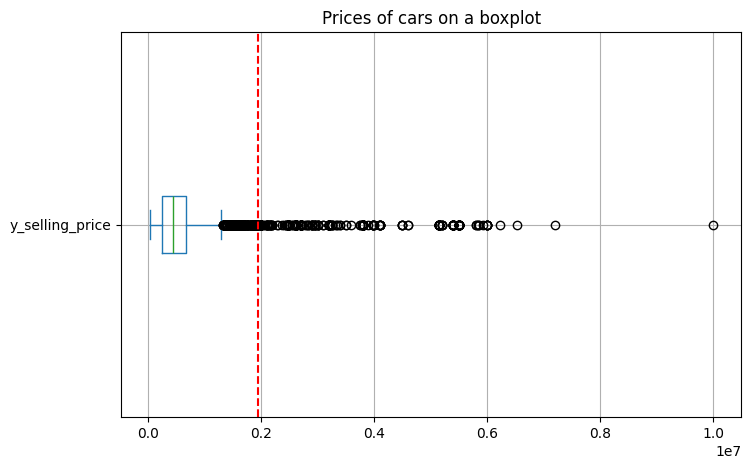

In [71]:
df.y_selling_price.plot.box(grid=True, figsize=(8, 5), vert=False, title="Prices of cars on a boxplot");
plt.axvline(df.y_selling_price.quantile(.95), c="r", linestyle="--");

In [72]:
df.loc[df.y_selling_price > df.y_selling_price.quantile(.95)].shape[0]

403

In [73]:
df.y_selling_price = np.where(
  df.y_selling_price > df.y_selling_price.quantile(.95), np.nan, df.y_selling_price
)

In [74]:
df = df.dropna()

In [75]:
#drive.mount("/content/drive")

In [76]:
"""
path = "/content/drive/MyDrive/Vehicle_prices/vehicle_prices.csv"
df.to_csv(path, index=False)
files.download(path)
"""

'\npath = "/content/drive/MyDrive/Vehicle_prices/vehicle_prices.csv"\ndf.to_csv(path, index=False)\nfiles.download(path)\n'